In [7]:
# Import packages and load file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import pandasql as ps
pysql = lambda q: ps.sqldf(q, globals())

file = 'Adops & Data Scientist Sample Data.xlsx'

# Load file
xls = pd.ExcelFile(file)

# Check if file loaded properly
print(xls.sheet_names)

['Q1 Analytics', 'Q2 Regression']


In [2]:
# Load data to dataframe
df_regression = xls.parse('Q2 Regression', skiprows = 0, header=None, names = ['A', 'B', 'C'])

# First look at data
print(df_regression.shape)
print(df_regression.head())

(300, 3)
          A         B          C
0  0.490142 -0.179654  11.536508
1 -1.414793 -1.225605  11.828531
2  0.943066  4.506148  -3.235349
3  3.569090  5.068347 -23.891922
4 -1.702460  6.905051 -22.125437


In [4]:
# Initial data analysis

Xi = df_regression['A']
Yi = df_regression['B']
Zi = df_regression['C']

xi_mean = Xi.mean()
yi_mean = Yi.mean()
zi_mean = Zi.mean()

print('Original data, mean values:')
print("x-mean:", xi_mean)
print("y_mean:", yi_mean)
print("z-mean: ", zi_mean)

Original data, mean values:
x-mean: 2.316687656089605
y_mean: 2.012932259204078
z-mean:  -41.56754438714707


<Figure size 432x288 with 0 Axes>

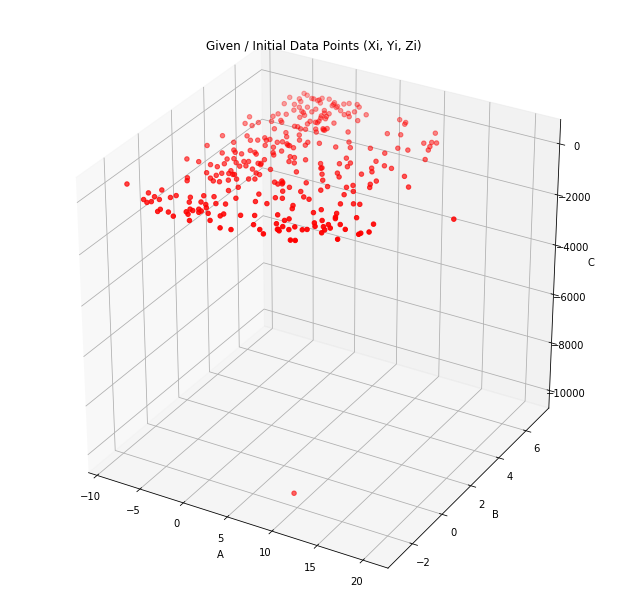

In [25]:
# Plot - Original Data

plt.clf()
plt.figure(figsize=(11,11))
ax = plt.axes(projection='3d')
ax.scatter(Xi, Yi, Zi, color = 'red')
ax.set_xlabel('A')
ax.set_ylabel('B')
ax.set_zlabel('C')
plt.title('Given / Initial Data Points (Xi, Yi, Zi)')
plt.show()

In [11]:
# Removing the outlier point at the very bottom

querySQL_removeOutlier = """SELECT A, B, C FROM  df_regression where C > -350"""

# Cleaned data, after removing outlier
data = pysql(querySQL_removeOutlier)   

print(data.shape)
print(data.head())

print("\nZ-mean (original data): ", zi_mean, Zi.shape)

# Updated data
X = data['A']
Y = data['B']
Z = data['C']
print("Z-mean (after outlier cleanup): ", Z.mean(), Z.shape)

(299, 3)
          A         B          C
0  0.490142 -0.179654  11.536508
1 -1.414793 -1.225605  11.828531
2  0.943066  4.506148  -3.235349
3  3.569090  5.068347 -23.891922
4 -1.702460  6.905051 -22.125437

Z-mean (original data):  -41.56754438714707 (300,)
Z-mean (after outlier cleanup):  -8.26509470282313 (299,)


In [21]:
# Building the Bivariate Polynomial Function Regression Model

M = pd.DataFrame()
M['1'] = [1 for i in range(len(X))]
M['x'] = X
M['y'] = Y
M['x^2'] = X*X
M['xy'] = X*Y
M['x^2*y'] = X*X*Y
M['x*y^2'] = X*Y*Y
M['y^2'] = Y*Y

# Check
print(M.shape)
print(M.head())

# Matrix Inverse - to solve the system of linear equations
M_inverse = np.linalg.pinv(M.values) 
print(M_inverse)

#Calculate regression coefficients where, Z = b0 + b1.X + b2.Y + b3.X^2 + b4.X.Y + b5.X^2.Y + b6.X.Y^2 + b7.Y^2
b = M_inverse.dot(Z)    # Matrix multiplication with .dot()

print('\n')
print(b.shape)
print(b)

(299, 8)
   1         x         y        x^2         xy      x^2*y      x*y^2  \
0  1  0.490142 -0.179654   0.240240  -0.088056  -0.043160   0.015820   
1  1 -1.414793 -1.225605   2.001639   1.733977  -2.453218  -2.125170   
2  1  0.943066  4.506148   0.889373   4.249593   4.007645  19.149292   
3  1  3.569090  5.068347  12.738400  18.089386  64.562638  91.683291   
4  1 -1.702460  6.905051   2.898370 -11.755575  20.013397 -81.172848   

         y^2  
0   0.032276  
1   1.502107  
2  20.305365  
3  25.688145  
4  47.679735  
[[ 9.16834581e-03  8.29755806e-03  2.94504937e-03 ...  1.80663486e-03
  -1.52048878e-03  1.77305624e-03]
 [ 3.93043197e-04 -3.45727128e-04  1.25355459e-04 ...  9.82415022e-04
  -1.28979060e-03  1.35877554e-03]
 [-5.44652295e-04 -2.53800452e-03  2.50821070e-03 ...  5.39981380e-04
  -2.43001173e-03  4.74569813e-04]
 ...
 [ 1.71560641e-05  1.20245265e-05 -3.73809258e-05 ...  2.34016908e-05
   1.01640588e-04  2.56884192e-05]
 [ 2.90345107e-06 -1.18280838e-05  4.101870

<Figure size 432x288 with 0 Axes>

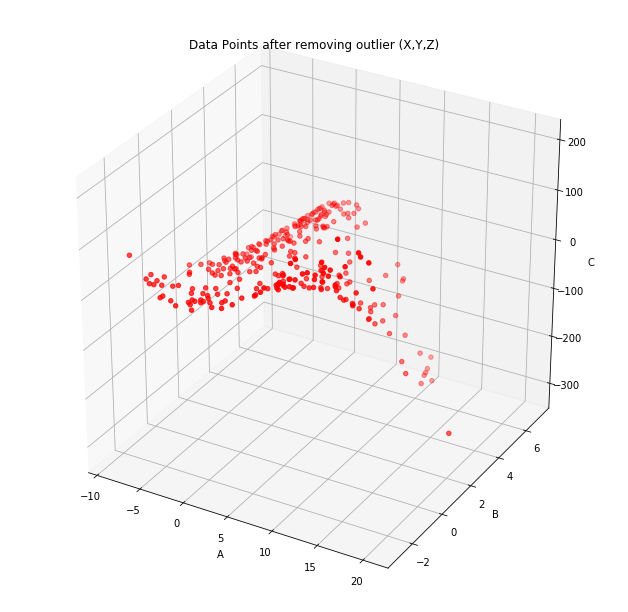

In [16]:
# Plot - Original Data plot after removing outlier

plt.clf()
fig = plt.figure(figsize=(11,11))
ax = fig.gca(projection='3d')

ax.scatter(X, Y, Z, color = 'red')
ax.set_xlabel('A')
ax.set_ylabel('B')
ax.set_zlabel('C')
plt.title('Data Points after removing outlier (X,Y,Z)')
plt.show()

<Figure size 432x288 with 0 Axes>

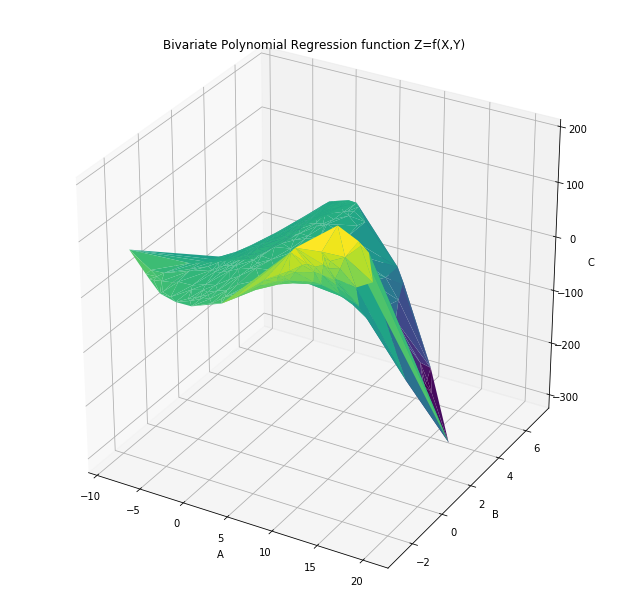

In [22]:
# Plot - Bivariate Polynomial Regression function Z=f(X,Y)

plt.clf()

fig = plt.figure(figsize=(11,11))
Z_regression = b[0] + b[1]*X + b[2]*Y + b[3]*(X**2) + b[4]*X*Y +b[5]*(X**2)*Y +b[6]*X*(Y**2) + b[7]*(Y**2)

ax = fig.gca(projection='3d')
ax.plot_trisurf(X, Y, Z_regression, cmap=plt.cm.viridis, linewidth=0.2)

ax.set_xlabel('A')
ax.set_ylabel('B')
ax.set_zlabel('C')
plt.title('Bivariate Polynomial Regression function Z=f(X,Y)')

plt.show()

<Figure size 432x288 with 0 Axes>

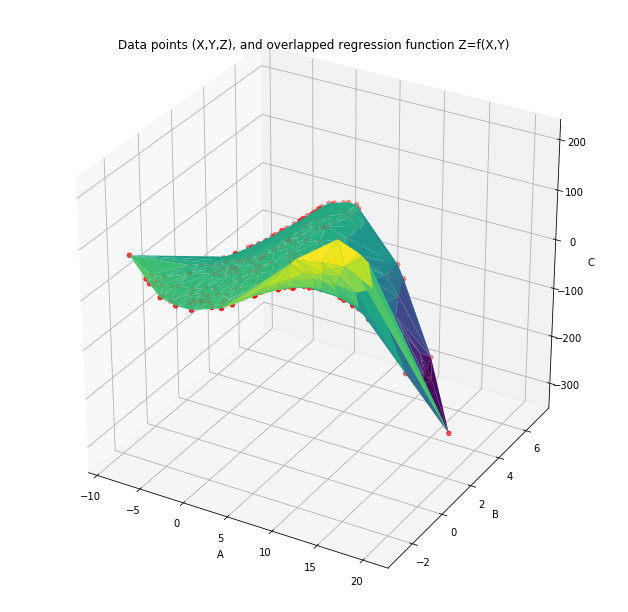

In [24]:
# Plot - Both - Fit of given points on regression surface 

plt.clf()

fig = plt.figure(figsize=(11,11))
Z_regression = b[0] + b[1]*X + b[2]*Y + b[3]*(X**2) + b[4]*X*Y +b[5]*(X**2)*Y +b[6]*X*(Y**2) + b[7]*(Y**2)

ax = fig.gca(projection='3d')
ax.scatter(X, Y, Z, color = 'red')
ax.plot_trisurf(X, Y, Z_regression, cmap=plt.cm.viridis, linewidth=0.2)

ax.set_xlabel('A')
ax.set_ylabel('B')
ax.set_zlabel('C')
plt.title('Data points (X,Y,Z), and overlapped regression function Z=f(X,Y)')

plt.show()

In [20]:
print('Solution Summary (Bivariate Polynomial Regression):')

print('\nRegression Equation: Z = f(X,Y) = b0 + b1.X + b2.Y + b3.X^2 + b4.X.Y + b5.X^2.Y + b6.X.Y^2 + b7.Y^2')
print('\nCoefficient Values [b0, b1, b2, b3, b4, b5, b6, b7]:')
print(b)

Solution Summary (Bivariate Polynomial Regression):

Regression Equation: Z = f(X,Y) = b0 + b1.X + b2.Y + b3.X^2 + b4.X.Y + b5.X^2.Y + b6.X.Y^2 + b7.Y^2

Coefficient Values [b0, b1, b2, b3, b4, b5, b6, b7]:
[ 1.00000020e+01  1.99999986e+00 -3.00000016e+00  5.54846366e-09
  4.49599079e-08 -4.00000004e-01  9.26011824e-09 -4.30481925e-09]
